In [81]:
# setup & dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

base_url="https://api.rawg.io/api/"

In [78]:
# make a dataframe of all parent platforms and the number of games they have
platform_id=[]
platform_name=[]
platform_gamecount=[]

platforms=requests.get(base_url+"platforms/lists/parents").json()
for i in range(len(platforms["results"])):
    platform_id.append(platforms["results"][i]["id"])
    platform_name.append(platforms["results"][i]["name"])
    game_count=0
    for j in range(len(platforms["results"][i]["platforms"])):
        game_count=game_count+platforms["results"][i]["platforms"][j]["games_count"]
    platform_gamecount.append(game_count)
    
platform_df = pd.DataFrame(
    {
        "ID" : platform_id,
        "name" : platform_name,
        "number of games" : platform_gamecount
    }
)
platform_df=platform_df.sort_values("number of games",ascending=False)
platform_df

,ID,name,number of games
0,1,PC,234079
13,14,Web,88574
3,4,iOS,66313
5,5,Apple Macintosh,54825
6,6,Linux,36499
4,8,Android,30130
7,7,Nintendo,15439
1,2,PlayStation,15290
2,3,Xbox,6668
9,10,Commodore / Amiga,2025


Text(0.5, 1.0, 'Most Popular Gaming Platforms of All Time')

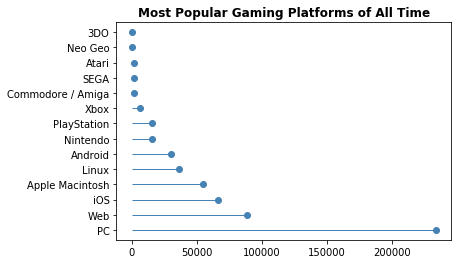

In [94]:
# lollipop plot of most popular gaming platforms of all time
plt.hlines(platform_df["name"], xmin=0, xmax=platform_df["number of games"],linewidth=1,color='steelblue')
plt.plot(platform_df["number of games"], platform_df["name"], "o", color='steelblue')
plt.title("Most Popular Gaming Platforms of All Time",fontweight="bold")

In [95]:
# make a dataframe of all game stores and the number of games they have
store_id=[]
store_name=[]
store_gamecount=[]

stores=requests.get(base_url+"stores").json()
for i in range(len(stores["results"])):
    store_id.append(stores["results"][i]["id"])
    store_name.append(stores["results"][i]["name"])
    store_gamecount.append(stores["results"][i]["games_count"])
    
store_df = pd.DataFrame(
    {
        "ID" : store_id,
        "name" : store_name,
        "number of games" : store_gamecount
    }
)

store_df=store_df.sort_values("number of games",ascending=False)
store_df

,ID,name,number of games
8,9,itch.io,259224
3,4,App Store,64787
0,1,Steam,41717
7,8,Google Play,16064
5,6,Nintendo Store,7733
1,3,PlayStation Store,6473
2,2,Xbox Store,3019
4,5,GOG,2693
6,7,Xbox 360 Store,1760
9,11,Epic Games,258


Text(0.5, 1.0, 'Most Popular Game Stores of All Time')

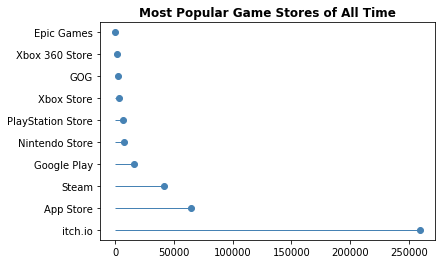

In [96]:
# lollipop plot of most popular game stores of all time
plt.hlines(store_df["name"], xmin=0, xmax=store_df["number of games"],linewidth=1,color='steelblue')
plt.plot(store_df["number of games"], store_df["name"], "o", color='steelblue')
plt.title("Most Popular Game Stores of All Time",fontweight="bold")

In [20]:
# API call for all games released in 2019

game_name=[]
game_playtime=[]
game_platform_num=[]
game_platform=[]
game_store_num=[]
game_store=[]
game_genre=[]
game_releasedate=[]
game_rating=[]
game_rating_top=[]
game_rating_count=[]
game_metacritic=[]
added_count=[]

count=1
while count:
    response=requests.get(base_url+"games?dates=2019-01-01,2019-12-31&page="+str(count))
    if response.status_code!=200:
        break
    else:
        games=response.json()
        print(base_url+"games?dates=2019-01-01,2019-12-31&page="+str(count))
        for i in range(len(games["results"])):
            game_name.append(games["results"][i]["name"])
            game_playtime.append(games["results"][i]["playtime"])
            try:
                game_platform_num.append(len(games["results"][i]["platforms"]))
                game_platform_temp=[]
                for j in range(len(games["results"][i]["parent_platforms"])):
                    game_platform_temp.append(games["results"][i]["parent_platforms"][j]["platform"]["name"])
                game_platform.append(game_platform_temp)
            except:
                game_platform_num.append("None")
                game_platform.append("None")
            try:
                game_store_num.append(len(games["results"][i]["stores"]))
                game_store_temp=[]
                for j in range(len(games["results"][i]["stores"])):
                    game_store_temp.append(games["results"][i]["stores"][j]["store"]["name"])
                game_store.append(game_store_temp)
            except:
                game_store_num.append("None")
                game_store.append("None")
            try:
                game_genre_temp=[]
                for j in range(len(games["results"][i]["genres"])):
                    game_genre_temp.append(games["results"][i]["genres"][j]["name"])
                game_genre.append(game_genre_temp)
            except:
                game_genre.append("None")
            game_releasedate.append(games["results"][i]["released"])
            game_rating.append(games["results"][i]["rating"])
            game_rating_top.append(games["results"][i]["rating_top"])
            game_rating_count.append(games["results"][i]["ratings_count"])
            game_metacritic.append(games["results"][i]["metacritic"])
            added_count.append(games["results"][i]["added_by_status"])
        count += 1

https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=1
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=2
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=3
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=4
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=5
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=6
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=7
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=8
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=9
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=10
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=11
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=12
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=13
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=14
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=15
https://api.rawg.io

https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=125
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=126
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=127
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=128
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=129
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=130
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=131
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=132
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=133
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=134
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=135
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=136
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=137
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=138
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page

https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=248
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=249
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=250
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=251
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=252
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=253
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=254
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=255
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=256
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=257
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=258
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=259
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=260
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=261
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page

https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=371
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=372
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=373
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=374
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=375
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=376
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=377
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=378
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=379
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=380
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=381
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=382
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=383
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=384
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page

https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=494
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=495
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=496
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=497
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=498
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=499
https://api.rawg.io/api/games?dates=2019-01-01,2019-12-31&page=500


In [97]:
# create a giant dataframe of all games released in 2019
game_df = pd.DataFrame(
    {
        "name" : game_name,
        "playtime" : game_playtime,
        "number of platforms" : game_platform_num,
        "platforms" : game_platform,
        "number of stores" : game_store_num,
        "stores" : game_store,
        "genres" : game_genre,
        "release date" : game_releasedate,
        "rating" : game_rating,
        "max rating" : game_rating_top,
        "rating count" : game_rating_count,
        "metacritic score" : game_metacritic,
        "added" : added_count
          }
)

game_df

,name,playtime,number of platforms,platforms,number of stores,stores,genres,release date,rating,max rating,rating count,metacritic score,added
0,Death Stranding,0,2,"[PC, PlayStation]",3,"[Steam, PlayStation Store, Epic Games]","[Adventure, Action]",2019-11-08,4.37,5,718,82.0,"{'yet': 232, 'owned': 1889, 'beaten': 424, 'to..."
1,Sekiro: Shadows Die Twice,17,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]","[Action, RPG]",2019-03-22,4.38,5,995,90.0,"{'yet': 213, 'owned': 1692, 'beaten': 512, 'to..."
2,Apex Legends,0,5,"[PC, PlayStation, Xbox, Apple Macintosh, Ninte...",3,"[Steam, PlayStation Store, Xbox Store]","[Shooter, Massively Multiplayer, Action]",2019-02-04,3.68,4,1219,88.0,"{'yet': 58, 'owned': 2307, 'beaten': 163, 'top..."
3,Borderlands Game of the Year Enhanced,2,3,"[PC, PlayStation, Xbox]",1,[Steam],"[Shooter, Action, RPG]",2019-04-03,3.82,4,592,78.0,"{'yet': 189, 'owned': 2458, 'beaten': 341, 'to..."
4,Devil May Cry 5,10,3,"[PC, PlayStation, Xbox]",2,"[Steam, Xbox Store]",[Action],2019-03-08,4.24,5,806,88.0,"{'yet': 179, 'owned': 1571, 'beaten': 564, 'to..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Pong Battle Royale (TetraStudios),0,1,[PC],1,[itch.io],[Shooter],2019-06-06,0.00,0,0,NaN,None
9996,Copy Clock,0,1,[Web],1,[itch.io],[Puzzle],2019-06-06,0.00,0,0,NaN,None
9997,Purgatory (itch) (Gunja Fury),0,1,[Web],1,[itch.io],[],2019-06-06,0.00,0,0,NaN,None
9998,The Crowd VR,0,1,[PC],1,[itch.io],[RPG],2019-06-06,0.00,0,0,NaN,None


In [102]:
# get release month from release date
game_df["month"] = pd.DatetimeIndex(game_df["release date"]).month
game_df.to_csv("game.csv")

In [103]:
# dataframe with only games that have a rating score of >0 
game_df_rated=game_df[game_df["rating"]>0]
game_df_rated.to_csv("game_rated.csv")

In [105]:
# dataframe with only games that have a metacritic score (note a lot of games do not have one)
game_df_metacritic=game_df_rated.dropna(how="any",subset=["metacritic score"])
game_df_metacritic.to_csv("game_metacritic.csv")

In [108]:
# get game rating by platform
platform_df["rating"]=0
platform_df["rating count"]=0

for i in game_df_rated.index:
    rating=game_df_rated.loc[i,"rating"]*game_df_rated.loc[i,"rating count"]
    rating_count=game_df_rated.loc[i,"rating count"]
    platform=game_df_rated.loc[i,"platforms"]
    for j in platform:
        for k in platform_df.index:
            if platform_df.loc[k,"name"]==j:
                platform_df.loc[k,"rating"]=platform_df.loc[k,"rating"]+float(rating)
                platform_df.loc[k,"rating count"]=platform_df.loc[k,"rating count"]+int(rating_count)

platform_df["avg rating"]=platform_df["rating"]/platform_df["rating count"]

platform_df.to_csv("game_platform.csv")

In [109]:
# get game rating by game store
store_df["rating"]=0
store_df["rating count"]=0

for i in game_df_rated.index:
    rating=game_df_rated.loc[i,"rating"]*game_df_rated.loc[i,"rating count"]
    rating_count=game_df_rated.loc[i,"rating count"]
    store=game_df_rated.loc[i,"stores"]
    for j in store:
        for k in store_df.index:
            if store_df.loc[k,"name"]==j:
                store_df.loc[k,"rating"]=store_df.loc[k,"rating"]+float(rating)
                store_df.loc[k,"rating count"]=store_df.loc[k,"rating count"]+int(rating_count)

store_df["avg rating"]=store_df["rating"]/store_df["rating count"]

store_df.to_csv("game_store.csv")